In [222]:
from AVQ_utils import *
%load_ext autoreload
%autoreload 2

import pandas as pd
import random

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
df = pd.read_csv('../../data/AVQ_2022_IT/MICRODATI/AVQ_Microdati_2022.csv')

/var/folders/6b/j2xt7shx2fq5nt2p9y46s3lh0000gn/T/ipykernel_31958/666482012.py:1: DtypeWarning: Columns (81,83,85,135,136,195,561,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,589,591,592,605,606,607,608,609,610,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,644,663,664,665,666,667,668,669,670,671,673,674,675,676,680,681,682,687,689,690,691,693,695,697,699,701,703,705,707,709,711,715,716,717,718,719,720,722,724,739,740) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/AVQ_2022_IT/MICRODATI/AVQ_Microdati_2022.csv')


In [4]:
# file:///Users/andrespasinetti/Documents/Dottorato%20Polimi/rl-for-behavioural-change/data/AVQ_2022_IT/METADATI/AVQ_Tracciato_2022.html
var_pillars = {'Alcohol': ['BIRRA', 'VINO', 'BICBIRRAM', 'BICVINOM', 'BFPAS', 'BICFUORIM', 'ALCOL', 'AMAR', 'LIQUOR', 'BICALTROM', 'ALCOL12', 'BICALC', 'NBICALCM', 'DOVCASP', 'DOVAMPA', 'DOVRISTO', 'DOVPUB', 'DOVDISCO', 'DOVSTR', 'DOVALT'],
               'Smoking': ['FUMO', 'FRFUMO', 'TFUMO', 'NSIGARM'],
               'Physical Activity': ['SPOCON', 'SPOSAL', 'ATTFIS', 'FREQSPO', 'ORESETSP', 'SPPAG', 'SPRIV', 'RETTA'],
               'Diet': ['PASTO', 'COLAZ', 'LPRAN', 'MENSA', 'PANPAS', 'SALUMI', 'POLLO', 'COV', 'CBOV', 'CMAIAL', 'LATTE', 'FORM', 'UOVA', 'PESCE', 'VERD', 'POMOD', 'FRUTTA', 'PZVERD', 'PZFRUTTA', 'LEGUMI', 'PATATE', 'SNACK', 'DOLCI', 'BEVEG', 'CGRAS', 'FGRAS', 'QTSALE', 'IODIO', 'ACMIN', 'BGAS'],
               'Weight': ['BMI'],
               'Mental Wellbeing': ['MH'],
               'Social Support': ['AMICI', 'PARENT', 'AMICI2', 'VICINI']}

Pilot study: 180 users (90 in intervention arm, of which 30 with wearables)
Clinical trial: 1800 users (900 in intervention arm, of which 45 with wearables)

ICO: 
- 400 from BS SP: women between 50-69 years of age
- 200 from CC SP: men and women 50-69 years of age

IEO:
- 500 from BS SP: women >= 40 years of age
- 100 with LS risk: men and women >= 50 years of age, currently smoker or former with smoking history of 30 packs/year

UMFCD:
- 400 from BS SP: women 30-69 years of age
- 200 from CC SP: men and women 40-69 years of age

In [151]:
def get_EG_CG(population, group_dim):
    eg = random.sample(population, group_dim)
    cg = random.sample(population, group_dim)
    return eg, cg

In [150]:
### ICO
# 400 from BC SP: women between 50-69 years of age
df_ICO_BC = df[(df['SESSO'] == 2) & (df['ETAMi'] >= 12) & (df['ETAMi'] <= 13)]  #females 55-64

# 200 from CC SP: men and women 50-69 years of age
df_ICO_CC = df[(df['ETAMi'] >= 12) & (df['ETAMi'] <= 13)] #55-64

### IEO
# 500 from BC SP: women >= 40 years of age
df_IEO_BC = df[(df['SESSO'] == 2) & (df['ETAMi'] >= 11)]  #females over 45

# 100 with LC risk: men and women >= 50 years of age, currently smoker or former with smoking history of 30 packs/year
df_IEO_LC = df[df['ETAMi'] >= 12]  #over 55

### UMFCD
# 400 from BC SP: women 30-69 years of age
df_UMFCD_BC = df[(df['SESSO'] == 2) & (df['ETAMi'] >= 10) & (df['ETAMi'] <= 13)]  #females 35-64

# 200 from CC SP: men and women 40-69 years of age
df_UMFCD_CC = df[(df['ETAMi'] >= 11) & (df['ETAMi'] <= 13)]  #45-64

In [ ]:
dem_hhs_ICO_BC = get_dem_hhs_for_population(df_ICO_BC, no_none=True)
dem_hhs_ICO_BC_EG, dem_hhs_ICO_BC_CG = get_EG_CG(dem_hhs_ICO_BC, group_dim=200)

dem_hhs_ICO_CC = get_dem_hhs_for_population(df_ICO_CC, no_none=True)
dem_hhs_ICO_CC_EG, dem_hhs_ICO_CC_CG = get_EG_CG(dem_hhs_ICO_CC, group_dim=100)

dem_hhs_IEO_BC = get_dem_hhs_for_population(df_IEO_BC, no_none=True)
dem_hhs_IEO_BC_EG, dem_hhs_IEO_BC_CG = get_EG_CG(dem_hhs_IEO_BC, group_dim=250)

dem_hhs_IEO_LC = get_dem_hhs_for_population(df_IEO_LC, no_none=True)
dem_hhs_IEO_LC = [d for d in dem_hhs_IEO_LC if d['hhs']['Smoking']!=10] #currently smoker
dem_hhs_IEO_LC_EG, dem_hhs_IEO_LC_CG = get_EG_CG(dem_hhs_IEO_LC, group_dim=50)

dem_hhs_UMFCD_BC = get_dem_hhs_for_population(df_UMFCD_BC, no_none=True)
dem_hhs_UMFCD_BC_EG, dem_hhs_UMFCD_BC_CG = get_EG_CG(dem_hhs_UMFCD_BC, group_dim=200)

dem_hhs_UMFCD_CC = get_dem_hhs_for_population(df_UMFCD_CC, no_none=True)
dem_hhs_UMFCD_CC_EG, dem_hhs_UMFCD_CC_CG = get_EG_CG(dem_hhs_UMFCD_CC, group_dim=100)

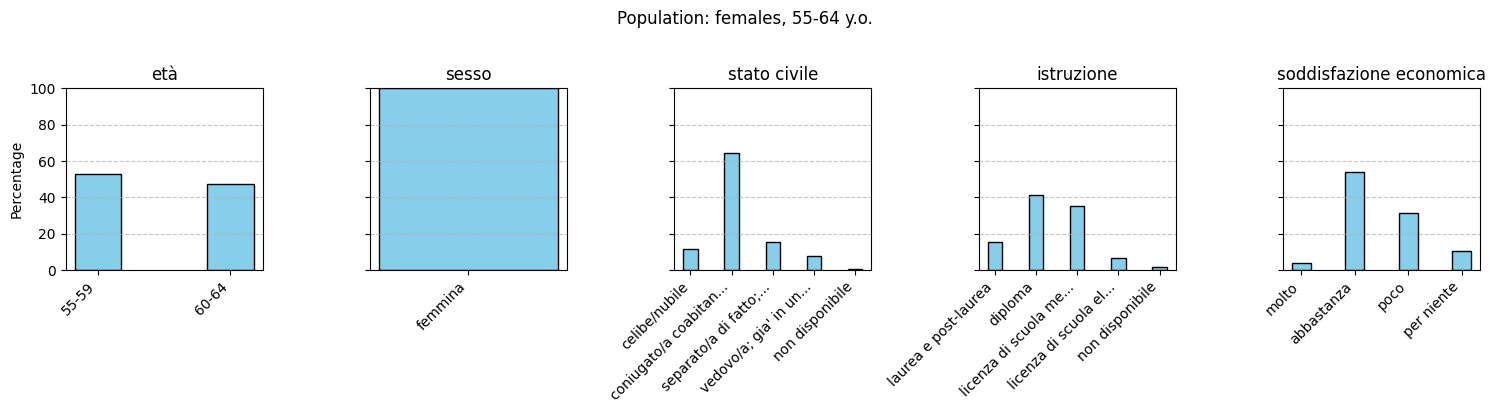

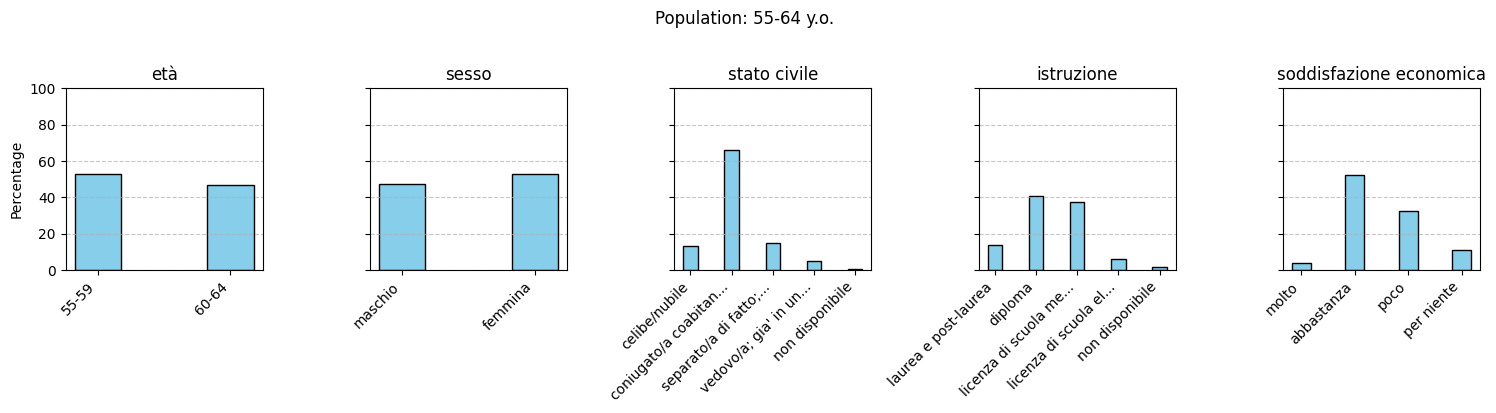

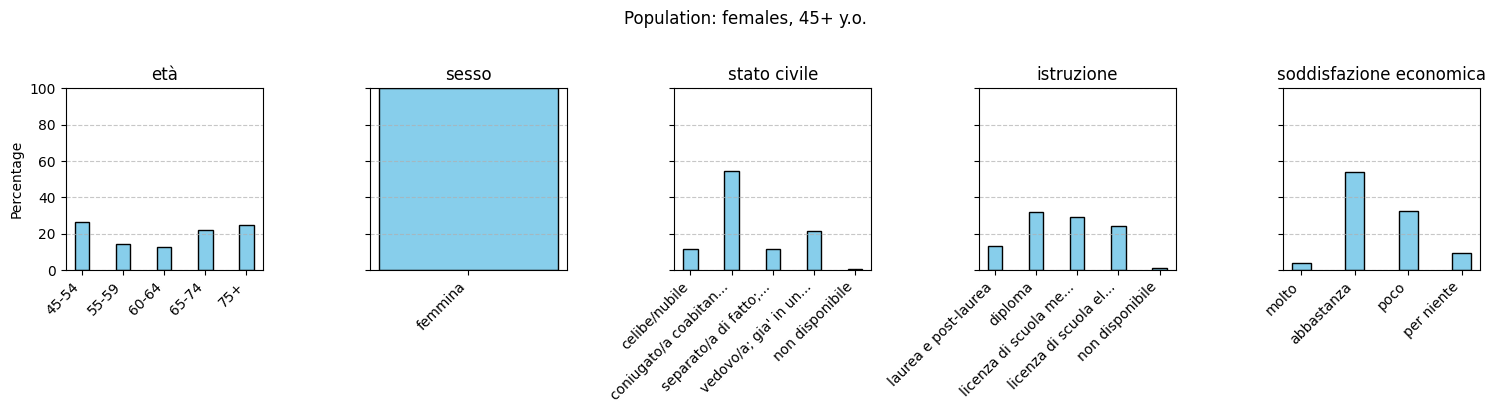

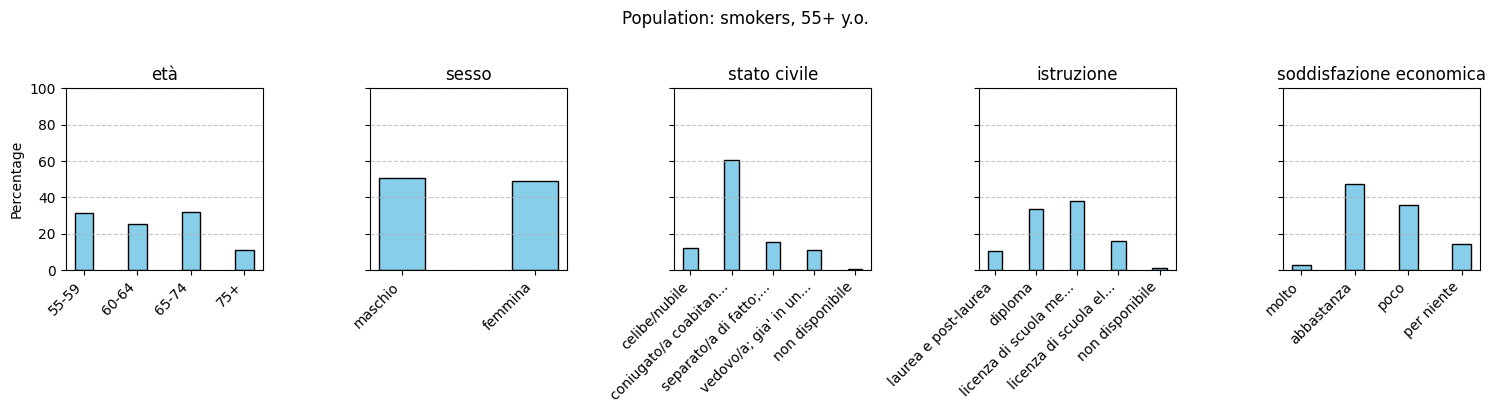

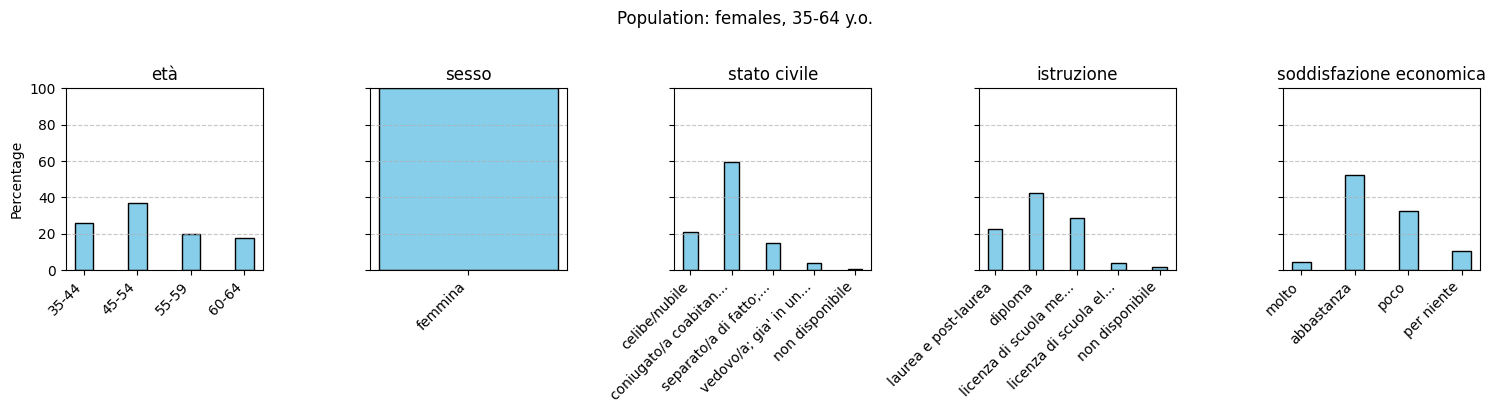

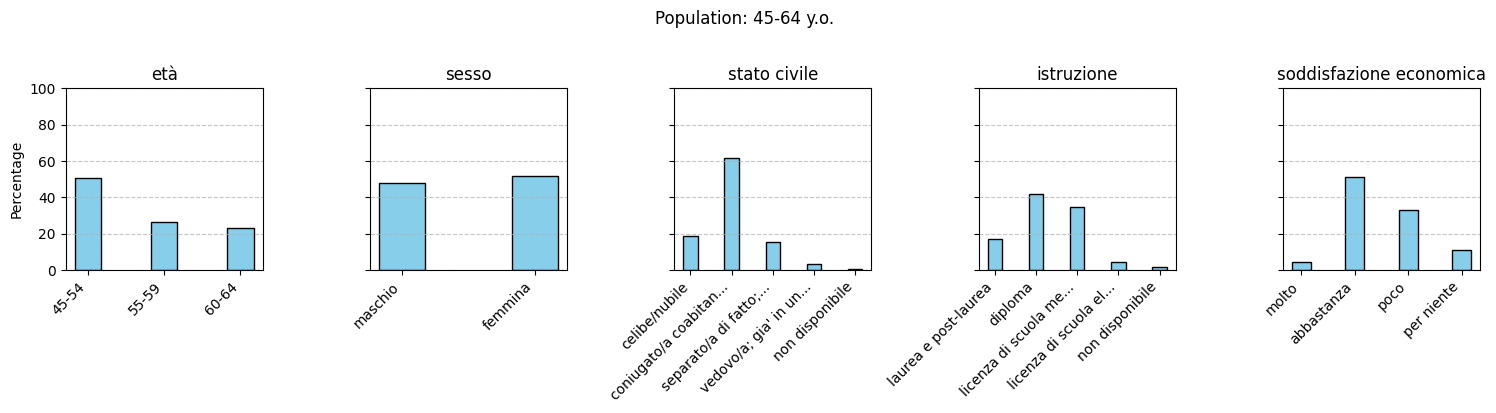

In [224]:
plot_dem_distribution(dem_hhs_ICO_BC, 'females, 55-64 y.o.')    
plot_dem_distribution(dem_hhs_ICO_CC, '55-64 y.o.')     
plot_dem_distribution(dem_hhs_IEO_BC, 'females, 45+ y.o.')     
plot_dem_distribution(dem_hhs_IEO_LC, 'smokers, 55+ y.o.')     
plot_dem_distribution(dem_hhs_UMFCD_BC, 'females, 35-64 y.o.')     
plot_dem_distribution(dem_hhs_UMFCD_CC, '45-64 y.o.')      

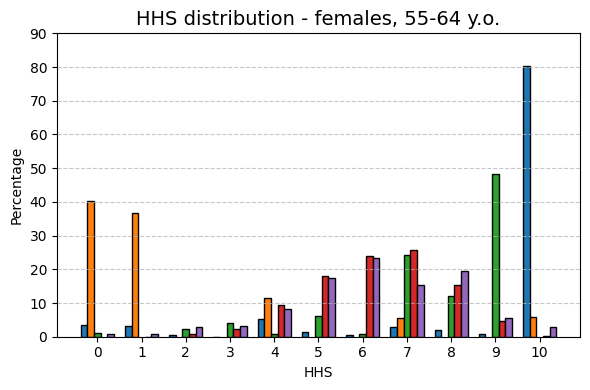

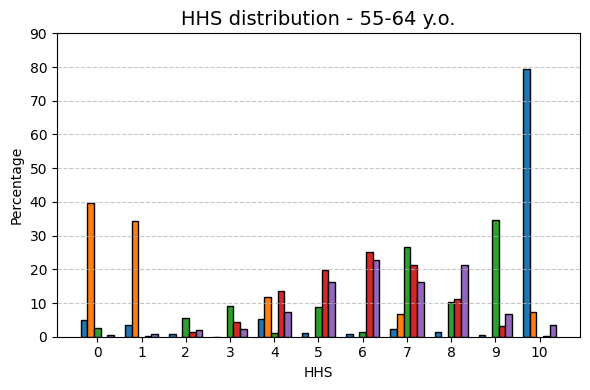

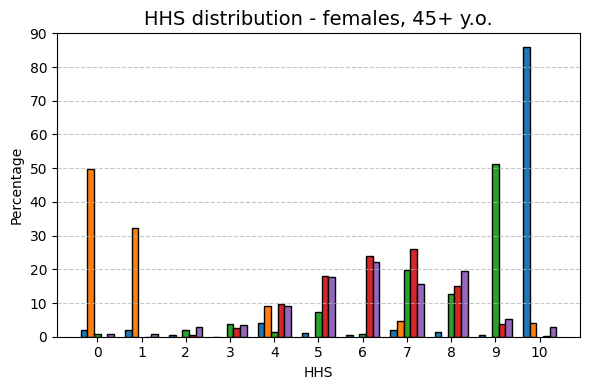

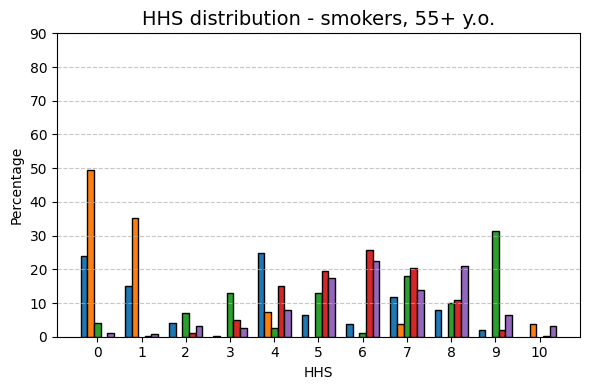

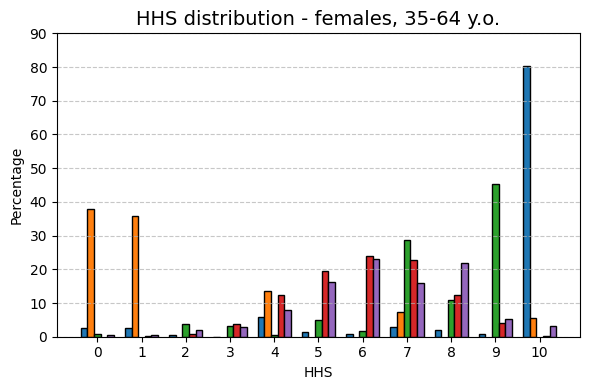

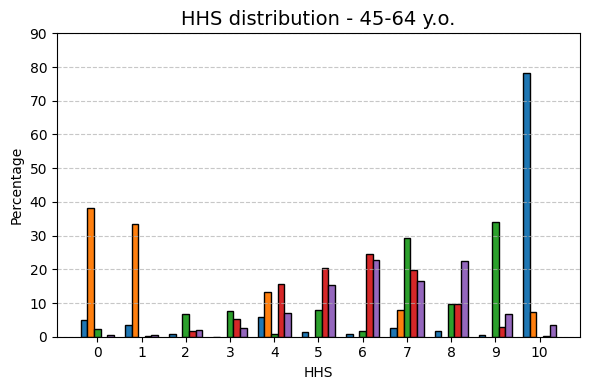

In [223]:
plot_hhs_distribution(dem_hhs_ICO_BC, 'females, 55-64 y.o.')    
plot_hhs_distribution(dem_hhs_ICO_CC, '55-64 y.o.')     
plot_hhs_distribution(dem_hhs_IEO_BC, 'females, 45+ y.o.')     
plot_hhs_distribution(dem_hhs_IEO_LC, 'smokers, 55+ y.o.')     
plot_hhs_distribution(dem_hhs_UMFCD_BC, 'females, 35-64 y.o.')     
plot_hhs_distribution(dem_hhs_UMFCD_CC, '45-64 y.o.')      